In [1]:
import os 
os.getcwd()
%cd 'drive/MyDrive/study_deeplearning'
os.getcwd()

/content/drive/MyDrive/study_deeplearning


'/content/drive/MyDrive/study_deeplearning'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2*x+np.random.rand(100,1)

x, y = Variable(x), Variable(y) 
W = Variable(np.zeros((1,1)))
b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x, W) + b
    return y

def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

In [ ]:
lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data
    b.data -= lr * b.grad.data
    print(W, b, loss)

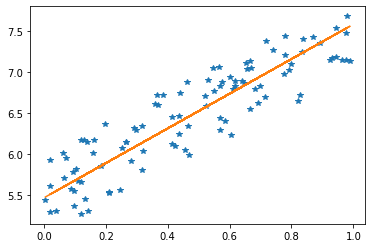

In [9]:
plt.plot(x.data, y.data, '*')
plt.plot(x.data, x.data*W.data+b.data)

In [3]:
import numpy as np
from dezero import Variable
import dezero.functions as F
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.rand(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.rand(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    
    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    
    if i % 1000 == 0:
        print(loss)

variable(0.8209681612957712)
variable(0.25326725620755336)
variable(0.2522734465088829)
variable(0.251079075920305)
variable(0.24924655132352758)
variable(0.24588877598349576)
variable(0.23931652204339027)
variable(0.22664935772724185)
variable(0.19660157730768885)
variable(0.11754542250017681)


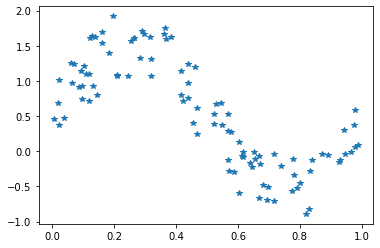

In [4]:
plt.plot(x, y, '*')

In [2]:
import numpy as np
from dezero import Variable, Parameter

x = Variable(np.array(1.0))
p = Parameter(np.array(2.0))
y = x * p

print(isinstance(p, Parameter))
print(isinstance(x, Parameter))
print(isinstance(y, Parameter))

True
False
False


In [4]:
from dezero import Layer

layer = Layer()
layer.p1 = Parameter(np.array(1))
layer.p2 = Parameter(np.array(2))
layer.p3 = Variable(np.array(3))
layer.p4 = 'test'

print(layer._params)
print('-----------')

for name in layer._params:
    print(name, layer.__dict__[name])

{'p1', 'p2'}
-----------
p1 variable(1)
p2 variable(2)


In [2]:
import numpy as np
from dezero import Variable
import dezero.functions as F
import dezero.layers as L

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

l1 = L.Linear(10)
l2 = L.Linear(1)

def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    
    l1.cleargrads()
    l2.cleargrads()
    loss.backward()
    
    for l in [l1, l2]:
        for p in l.params():
            p.data -= lr * p.grad.data
    if i%1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350177)
variable(0.12311905720649349)
variable(0.07888166506355149)
variable(0.07655073683421633)
variable(0.07637803086238223)
variable(0.07618764131185574)


In [10]:
import dezero.functions as F
import dezero.layers as L
from dezero import Layer


model = Layer()
model.l1 = L.Linear(5)
model.l2 = L.Linear(3)

def predcit(model, x):
    y = model.l1(x)
    y = F.sigmoid(y)
    y = model.l2(y)
    return y

for p in model.params():
    print(p)
    
model.cleargrads()

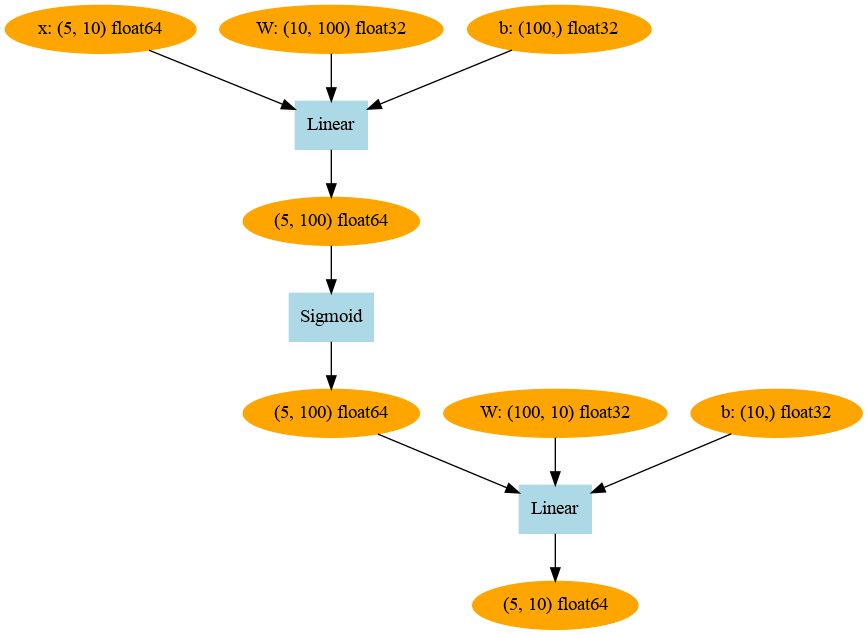

In [4]:
import numpy as np
from dezero import Variable, Model
import dezero.layers as L
import dezero.functions as F

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
    
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

x = Variable(np.random.randn(5, 10), name='x')
model = TwoLayerNet(100, 10)
model.plot(x)

In [1]:
import numpy as np
from dezero import Variable, Model, MLP
import dezero.layers as L
import dezero.functions as F

model = MLP((10, 20, 1))

In [2]:
import numpy as np
from dezero import Variable
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

lr = 0.2
max_iter = 10000
hidden_size = 10

model = MLP((hidden_size, 1))
optimizer = optimizers.SGD(lr)
optimizer.setup(model)

for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    
    model.cleargrads()
    loss.backward()
    
    optimizer.update()
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.2372159081431807)
variable(0.20793216413350177)
variable(0.12311905720649349)
variable(0.07888166506355149)
variable(0.07655073683421633)
variable(0.07637803086238223)
variable(0.07618764131185574)


In [1]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1, 2, 3], [4, 5, 8]]))
y = F.get_item(x, 1)
print(y)

y.backward()
print(x.grad)

variable([4 5 8])
variable([[0. 0. 0.]
          [1. 1. 1.]])


In [2]:
from dezero.models import MLP

model = MLP((10, 3))
x = np.array([[0.2, -0.4]])
y = model(x)
print(y)

variable([[ 0.268829    1.27589006 -0.38636412]])


In [5]:
import dezero.functions as F

x = np.array([[0.2, -0.4], [0.3, 0.5], [1.3, -3.2], [2.1, 0.3]])
t = np.array([2, 0, 1, 0])
y = model(x)
loss = F.softmax_cross_entropy_simple(y, t)
print(loss)

ValueError: shapes (4,2) and (10,100) not aligned: 2 (dim 1) != 10 (dim 0)

In [17]:
import dezero

x, t = dezero.datasets.get_spiral(train=True)
print(x.shape)
print(t.shape)

print(x[10], t[10])
print(x[110], t[110])

(300, 2)
(300,)
[-0.12995958 -0.00324155] 1
[ 0.3282343  -0.54941994] 0


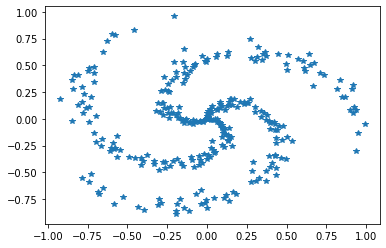

In [35]:
import matplotlib.pyplot as plt

plt.plot(x[:,0], x[:,1], '*')

In [2]:
import math
import numpy as np
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

x, t = dezero.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size)

for epoch in range(max_epoch):
    index = np.random.permutation(data_size)
    sum_loss = 0
    
    for i in range(max_iter):
        batch_index = index[i*batch_size:(i+1)*batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]
        
        y = model(batch_x)
        loss = F.softmax_cross_entropy_simple(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(batch_t)
        
    avg_loss = sum_loss / data_size
    print(f'epoch {epoch+1}, loss {avg_loss}')

AttributeError: 'Variable' object has no attribute 'clip'

In [2]:
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP
from dezero.datasets import Spiral
from dezero import DataLoader

batch_size = 10
max_epoch = 1

train_set = Spiral(train=True)
test_set = Spiral(train=False)
train_loader = DataLoader(train_set, batch_size)
test_loader = DataLoader(test_set, batch_size, shuffle=False)

for epoch in range(max_epoch):
    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entroy(y, t)
    
    for x, t in test_loader:
        print(x.shape, t.shape)
        break

(10, 2) (10,)
(10, 2) (10,)


In [1]:
import numpy as np
import dezero.functions as F

y = np.array([[0.2, 0.8, 0], [0.1, 0.9, 0], [0.8, 0.1, 0.1]])
t = np.array([1, 2, 0])
acc = F.accuracy(y, t)
print(acc)

variable(0.6666666666666666)


In [1]:
import cupy as cp

x = cp.arange(6).reshape(2, 3)
print(x)

y = x.sum(axis=1)
print(y)

ImportError: 
================================================================
Failed to import CuPy.

If you installed CuPy via wheels (cupy-cudaXXX or cupy-rocm-X-X), make sure that the package matches with the version of CUDA or ROCm installed.

On Linux, you may need to set LD_LIBRARY_PATH environment variable depending on how you installed CUDA/ROCm.
On Windows, try setting CUDA_PATH environment variable.

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

Original error:
  ImportError: libnvrtc.so.11.2: cannot open shared object file: No such file or directory
================================================================


In [2]:
!python -m pip install -U setuptools pip

     |████████████████████████████████| 958 kB 13.4 MB/s eta 0:00:01
  Using cached pip-21.3.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 52.0.0.post20210125
    Uninstalling setuptools-52.0.0.post20210125:
      Successfully uninstalled setuptools-52.0.0.post20210125
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
spyder 4.2.5 requires pyqt5<5.13, but you have pyqt5 5.15.4 which is incompatible.
spyder 4.2.5 requires pyqtwebengine<5.13, but you have pyqtwebengine 5.15.5 which is incompatible.


In [ ]:
CUDA_PATH=/opt/nvidia/cuda pip install cupy